In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure
import pylab

In [10]:
#import data
df = pd.read_csv('MLF_GP2_EconCycle.csv')
#dropping the atribute date because it's irrelevant
df = df.drop(['Date'],axis=1)
#summary of data
print("Size of data " + str(len(df)) + " x " + str(len(df.columns)))
print(df.head())

Size of data 223 x 16
   T1Y Index  T2Y Index  T3Y Index  T5Y Index  T7Y Index  T10Y Index  CP1M  \
0      10.41       9.86       9.50       9.20       9.14        9.10  9.75   
1      10.24       9.72       9.29       9.13       9.11        9.10  9.74   
2      10.25       9.79       9.38       9.20       9.15        9.12  9.72   
3      10.12       9.78       9.43       9.25       9.21        9.18  9.86   
4      10.12       9.78       9.42       9.24       9.23        9.25  9.77   

   CP3M   CP6M  CP1M_T1Y  CP3M_T1Y  CP6M_T1Y  USPHCI  PCT 3MO FWD  \
0  9.95  10.01  0.936599  0.955812  0.961575   47.08     0.011470   
1  9.90   9.96  0.951172  0.966797  0.972656   47.32     0.009298   
2  9.85   9.87  0.948293  0.960976  0.962927   47.39     0.010340   
3  9.95   9.98  0.974308  0.983202  0.986166   47.62     0.006720   
4  9.76   9.71  0.965415  0.964427  0.959486   47.76     0.005653   

   PCT 6MO FWD  PCT 9MO FWD  
0     0.018060     0.024406  
1     0.014866     0.020612  
2   

In [9]:
#determine how many of the columns of data are numeric versus categorical
print(df.dtypes)
i=0
j=0
print(df.iloc[0].dtypes)
for a in range(len(df.columns)):
    if(df.iloc[: ,a].dtypes == object):
        i += 1
    else:
        j += 1
print('Total number of numeric columns: ' + str(j))
print('Total number of categorical columns: ' + str(i))

T1Y Index      float64
T2Y Index      float64
T3Y Index      float64
T5Y Index      float64
T7Y Index      float64
T10Y Index     float64
CP1M           float64
CP3M           float64
CP6M           float64
CP1M_T1Y       float64
CP3M_T1Y       float64
CP6M_T1Y       float64
USPHCI         float64
PCT 3MO FWD    float64
PCT 6MO FWD    float64
PCT 9MO FWD    float64
dtype: object
float64
Total number of numeric columns: 16
Total number of categorical columns: 0


In [11]:
print("Number of missing values in each column")
print(df.isnull().sum())

Number of missing values in each column
T1Y Index      0
T2Y Index      0
T3Y Index      0
T5Y Index      0
T7Y Index      0
T10Y Index     0
CP1M           0
CP3M           0
CP6M           0
CP1M_T1Y       0
CP3M_T1Y       0
CP6M_T1Y       0
USPHCI         0
PCT 3MO FWD    0
PCT 6MO FWD    0
PCT 9MO FWD    0
dtype: int64


In [12]:
#some statistical analysis of the data set
df.describe()

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,USPHCI,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,8.030717,8.410673,8.563587,8.808655,8.979776,9.073498,7.942197,7.936906,7.892780,0.981765,0.983524,0.982666,60.594664,0.007083,0.014090,0.021078
std,3.158575,2.954431,2.820405,2.647742,2.542686,2.447525,3.405098,3.329354,3.181421,0.086243,0.077222,0.067152,9.512352,0.004839,0.009137,0.013037
min,3.180000,3.840000,4.170000,4.710000,5.050000,5.330000,3.110000,3.140000,3.190000,0.717523,0.713534,0.698496,47.080000,-0.006811,-0.009818,-0.012272
25%,5.735000,6.180000,6.410000,6.695000,6.965000,7.175000,5.605000,5.645000,5.635000,0.933849,0.939727,0.945402,50.370000,0.005526,0.010694,0.014351
50%,7.670000,8.000000,8.130000,8.330000,8.520000,8.610000,7.730000,7.720000,7.620000,0.972671,0.977941,0.979955,61.090000,0.008270,0.016184,0.024425
75%,9.840000,10.075000,10.375000,10.525000,10.640000,10.685000,9.345000,9.345000,9.300000,1.033005,1.026137,1.015973,67.005000,0.010203,0.019878,0.029398
max,16.720000,16.460000,16.220000,15.930000,15.650000,15.320000,18.950000,18.070000,16.660000,1.339223,1.277032,1.220480,79.210000,0.020297,0.036636,0.050174


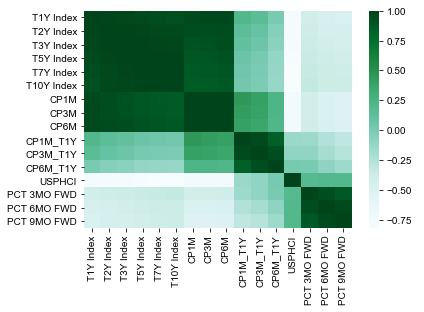

In [13]:
columnsNamesArr = df.columns.values
cm = np.corrcoef(df.values.T)
hm = sns.heatmap(cm,cmap='BuGn',cbar=True,xticklabels=columnsNamesArr,yticklabels=columnsNamesArr)
sns.set(rc={'figure.figsize':(11.7,8.27)})